In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

In [2]:
x_train = np.load("data/x_train_mix_ayn.npy")
y_train = np.load("data/y_train_mix_ayn.npy")
x_test = np.load("data/x_test_mix_ayn.npy")
y_test = np.load("data/y_test_mix_ayn.npy")

In [3]:
input_shape = x_train.shape[1:]
input_shape

(520, 299, 3)

In [4]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax'),
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 466440)            0         
                                                                 
 dense (Dense)               (None, 128)               59704448  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 59,705,093
Trainable params: 59,705,093
Non-trainable params: 0
_________________________________________________________________


In [5]:
model1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist1 = model1.fit(
    x_train, 
    y_train,
    epochs=15,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/15
37/37 [==============================] - 7s 193ms/step - loss: 35252.4492 - accuracy: 0.2745 - val_loss: 1566.4131 - val_accuracy: 0.4320
Epoch 2/15
37/37 [==============================] - 7s 191ms/step - loss: 723.8839 - accuracy: 0.5909 - val_loss: 454.6229 - val_accuracy: 0.5240
Epoch 3/15
37/37 [==============================] - 7s 189ms/step - loss: 461.5472 - accuracy: 0.6364 - val_loss: 2054.9414 - val_accuracy: 0.2980
Epoch 4/15
37/37 [==============================] - 7s 189ms/step - loss: 496.4818 - accuracy: 0.6745 - val_loss: 542.5231 - val_accuracy: 0.6000
Epoch 5/15
37/37 [==============================] - 7s 190ms/step - loss: 171.0309 - accuracy: 0.8191 - val_loss: 565.8165 - val_accuracy: 0.6980
Epoch 6/15
37/37 [==============================] - 7s 188ms/step - loss: 59.0499 - accuracy: 0.8945 - val_loss: 313.2107 - val_accuracy: 0.6740
Epoch 7/15
37/37 [==============================] - 7s 196ms/step - loss: 142.7260 - accuracy: 0.8264 - val_loss: 167.768

In [6]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss ='SparseCategoricalCrossentropy', 
    metrics=['accuracy'])

In [7]:
hist2 = model2.fit(
    x_train, 
    y_train,    
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
37/37 [==============================] - 98s 3s/step - loss: 15298.4326 - accuracy: 0.3636 - val_loss: 583.8379 - val_accuracy: 0.5820
Epoch 2/30
37/37 [==============================] - 97s 3s/step - loss: 142.0053 - accuracy: 0.7927 - val_loss: 111.0900 - val_accuracy: 0.7200
Epoch 3/30
37/37 [==============================] - 93s 3s/step - loss: 13.1461 - accuracy: 0.9409 - val_loss: 91.8336 - val_accuracy: 0.7280
Epoch 4/30
37/37 [==============================] - 95s 3s/step - loss: 2.3032 - accuracy: 0.9818 - val_loss: 76.5867 - val_accuracy: 0.7660
Epoch 5/30
37/37 [==============================] - 94s 3s/step - loss: 0.9003 - accuracy: 0.9891 - val_loss: 78.1263 - val_accuracy: 0.7560
Epoch 6/30
37/37 [==============================] - 93s 3s/step - loss: 1.6606 - accuracy: 0.9845 - val_loss: 117.4575 - val_accuracy: 0.7700
Epoch 7/30
37/37 [==============================] - 93s 3s/step - loss: 1.7466 - accuracy: 0.9882 - val_loss: 89.7348 - val_accuracy: 0.7380
Epo

In [8]:
model2.save("saved_models/model2.h5")
with open('saved_models/history2.json', 'w') as handle: # saving the history of the model
    json.dump(hist2.history, handle)

Transfer Learning

In [9]:
model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape, 
    include_top=False, 
    weights='imagenet')
model.trainable = False

model_tl = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        model,
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=5, activation='softmax')
    ]
)
model_tl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 17, 10, 1280)     2257984   
 ional)                                                          
                                                                 
 dropout_1 (Dropout)         (None, 17, 10, 1280)      0         
                                                                 
 flatten_2 (Flatten)         (None, 217600)            0         
                                                                 
 dense_4 (Dense)             (None, 5)                 1088005   
                                                                 
Total params: 3,345,989
Trainable params: 1,088,005
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
model_tl.compile(tf.keras.optimizers.Adam(),
                 loss='SparseCategoricalCrossentropy',
                 metrics=['accuracy'])
hist_tl = model_tl.fit(
    x_train, 
    y_train, 
    epochs=30, 
    batch_size=30, 
    validation_data=(x_test, y_test))

Epoch 1/30
37/37 [==============================] - 57s 2s/step - loss: 20.2859 - accuracy: 0.4700 - val_loss: 1.7220 - val_accuracy: 0.7900
Epoch 2/30
37/37 [==============================] - 55s 1s/step - loss: 1.6838 - accuracy: 0.8436 - val_loss: 3.6826 - val_accuracy: 0.6680
Epoch 3/30
37/37 [==============================] - 55s 1s/step - loss: 0.6421 - accuracy: 0.9100 - val_loss: 2.3621 - val_accuracy: 0.8300
Epoch 4/30
37/37 [==============================] - 55s 1s/step - loss: 0.4388 - accuracy: 0.9364 - val_loss: 2.9143 - val_accuracy: 0.7300
Epoch 5/30
37/37 [==============================] - 55s 1s/step - loss: 0.1799 - accuracy: 0.9682 - val_loss: 2.4695 - val_accuracy: 0.7480
Epoch 6/30
37/37 [==============================] - 55s 1s/step - loss: 0.1020 - accuracy: 0.9827 - val_loss: 1.7535 - val_accuracy: 0.8120
Epoch 7/30
37/37 [==============================] - 55s 1s/step - loss: 0.0571 - accuracy: 0.9845 - val_loss: 1.6286 - val_accuracy: 0.8240
Epoch 8/30
37/37 [=

In [11]:
model_tl.save("saved_models/model_tl.h5")
with open('saved_models/history_tl.json', 'w') as handle: # saving the history of the model
    json.dump(hist_tl.history, handle)

### Visualizations

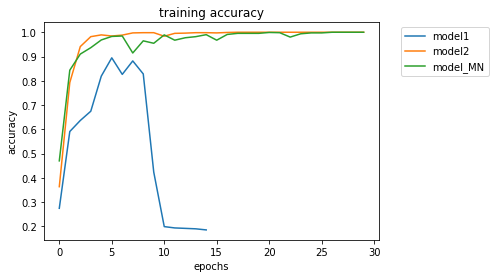

In [12]:
plt.plot(hist1.history["accuracy"], label="model1")
plt.plot(hist2.history["accuracy"], label="model2")
plt.plot(hist_tl.history["accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("training accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

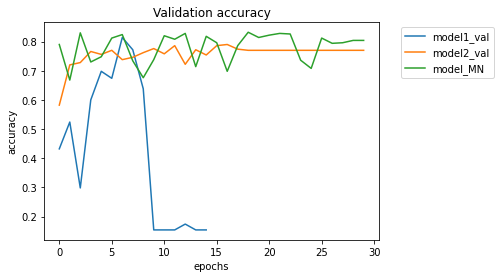

In [13]:
plt.plot(hist1.history["val_accuracy"], label="model1_val")
plt.plot(hist2.history["val_accuracy"], label="model2_val")
plt.plot(hist_tl.history["val_accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

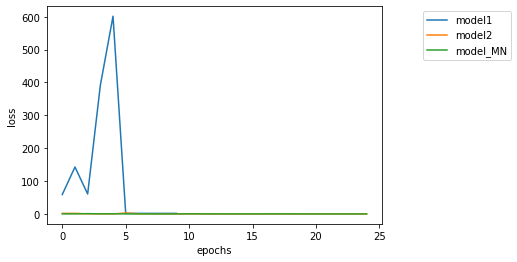

In [14]:
plt.plot(hist1.history["loss"][5:], label="model1")
plt.plot(hist2.history["loss"][5:], label="model2")
plt.plot(hist_tl.history["loss"][5:],label="model_MN")

# plt.plot(hist1.history["val_loss"][10:], label="model1_val")
# plt.plot(hist2.history["val_loss"][10:], label="model2_val")
# plt.plot(hist_fe.history["val_loss"][10:], label="model_fe_val")
# plt.plot(hist_tl.history["val_loss"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Evaluate accuracy with test set

In [15]:
# loss1, acc1 = model1.evaluate(x_test, y_test)
loss2, acc2 = model2.evaluate(x_test, y_test)
loss_tl, acc_tl = model_tl.evaluate(x_test, y_test)

16/16 [==============================] - 17s 1s/step - loss: 2.8762 - accuracy: 0.8040


In [16]:
pred = model_tl.predict(x_test)
labels = tf.argmax(pred, axis=1)
cm = tf.math.confusion_matrix(labels, y_test)

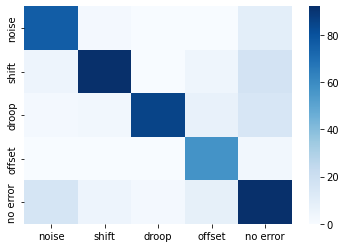

In [17]:
import seaborn as sns

l = ["noise", "shift", "droop", "offset", "no error"]
ax = sns.heatmap(cm, cmap="Blues")
ax.xaxis.set_ticklabels(l)
ax.yaxis.set_ticklabels(l)
plt.show()